# PCA

In [48]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Task 1: Exploratory Data Analysis (EDA):

In [3]:
#Load dataset
data = pd.read_csv('wine.csv')

In [4]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
data.duplicated().sum()

0

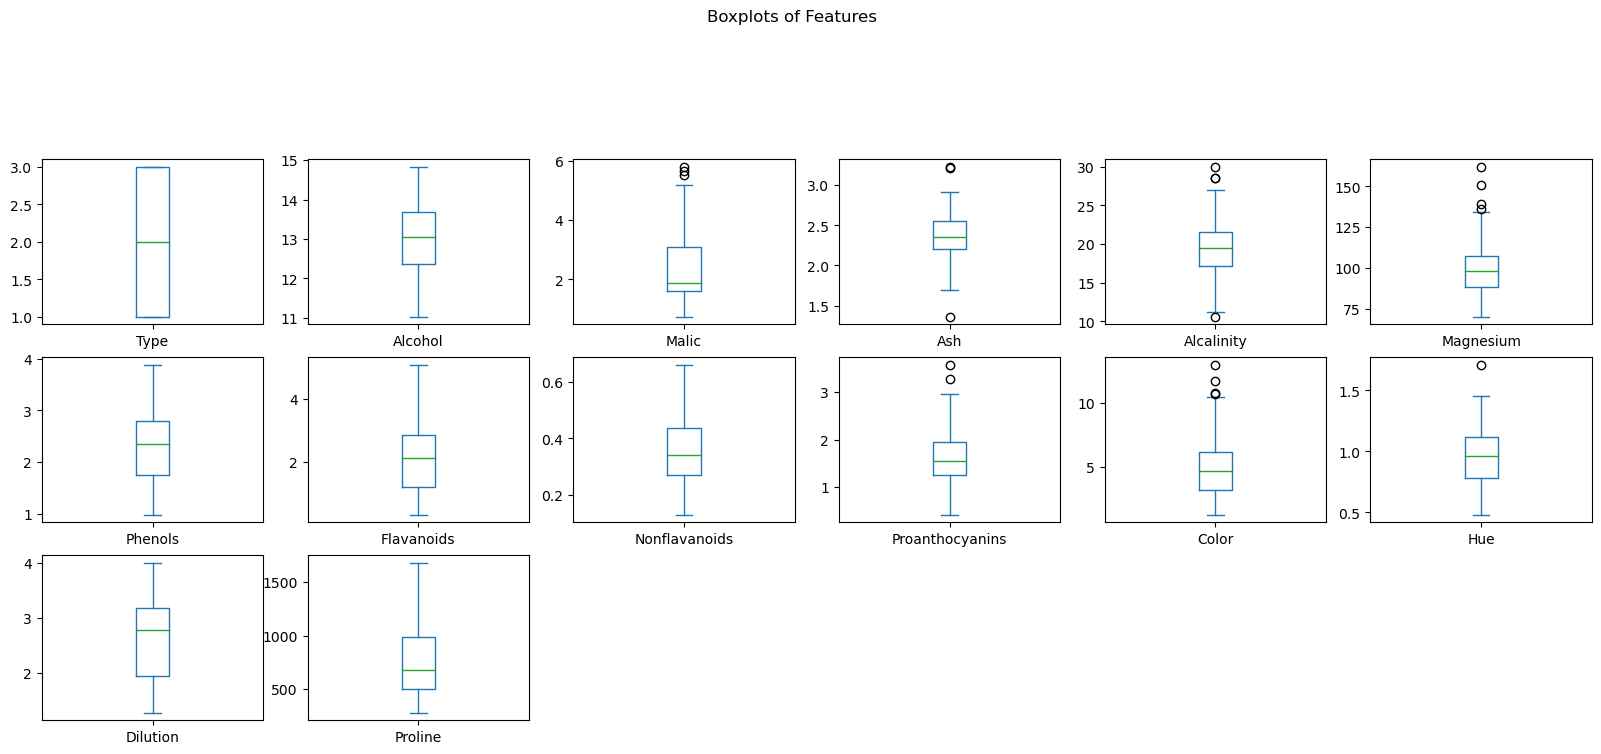

In [9]:
# Box plots
data.plot(kind='box', subplots=True,layout=(6,6),figsize=(20, 15))
plt.suptitle('Boxplots of Features')
plt.show()

In [10]:
# Remove outliers
# Fetch all column name
features = data.columns.tolist()
features

['Type',
 'Alcohol',
 'Malic',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Phenols',
 'Flavanoids',
 'Nonflavanoids',
 'Proanthocyanins',
 'Color',
 'Hue',
 'Dilution',
 'Proline']

In [11]:
#Calculate IQR
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1

In [12]:
for col in features:
    # Lower outliers (values below Q1 - 1.5 * IQR)
    data[col] = np.where(data[col] < (Q1[col] - 1.5 * IQR[col]), Q1[col] - 1.5 * IQR[col], data[col])
    
    # Higher outliers (values above Q3 + 1.5 * IQR)
    data[col] = np.where(data[col] > (Q3[col] + 1.5 * IQR[col]), Q3[col] + 1.5 * IQR[col], data[col])

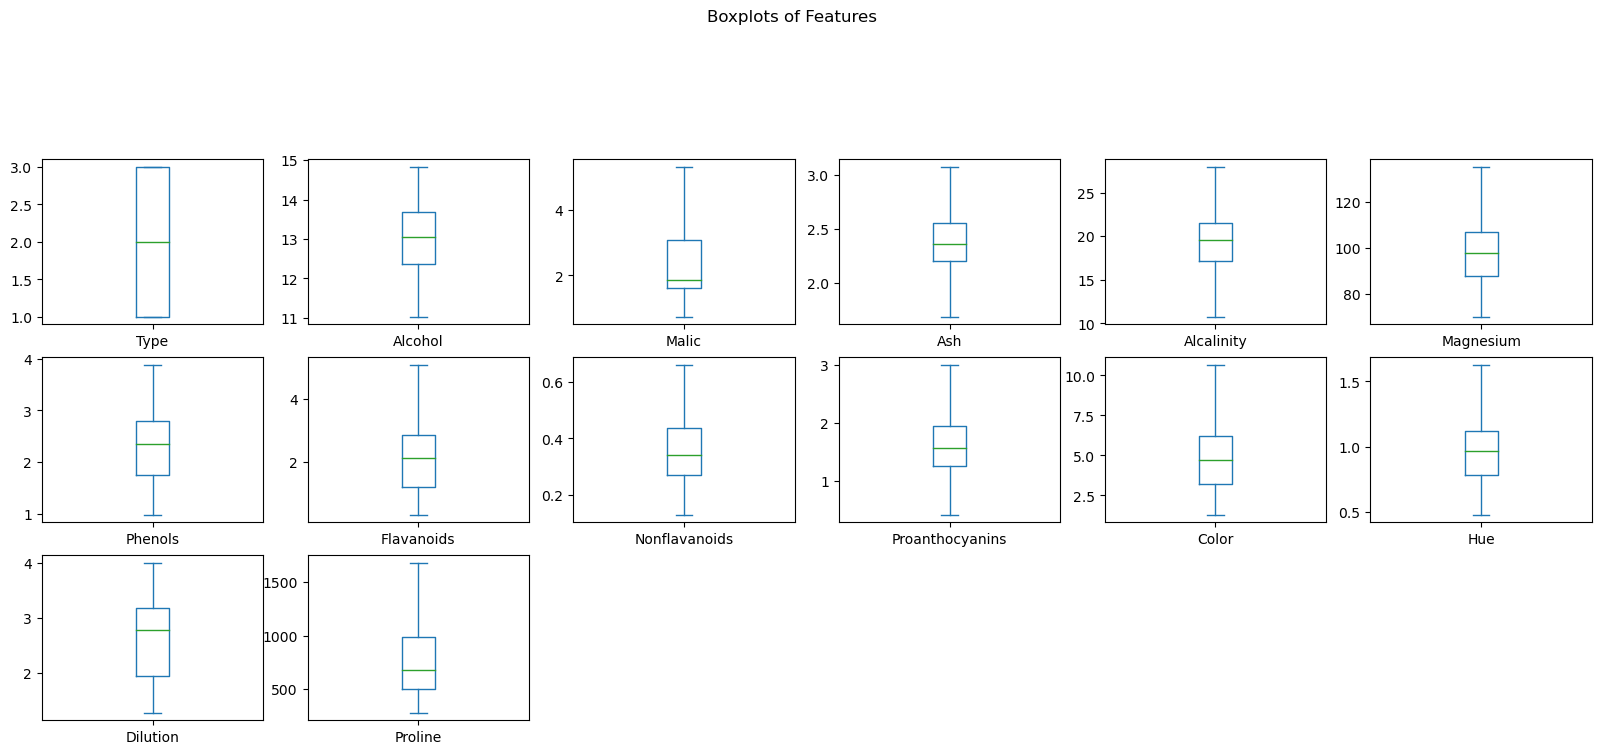

In [13]:
# Box plots
data.plot(kind='box', subplots=True,layout=(6,6),figsize=(20, 15))
plt.suptitle('Boxplots of Features')
plt.show()

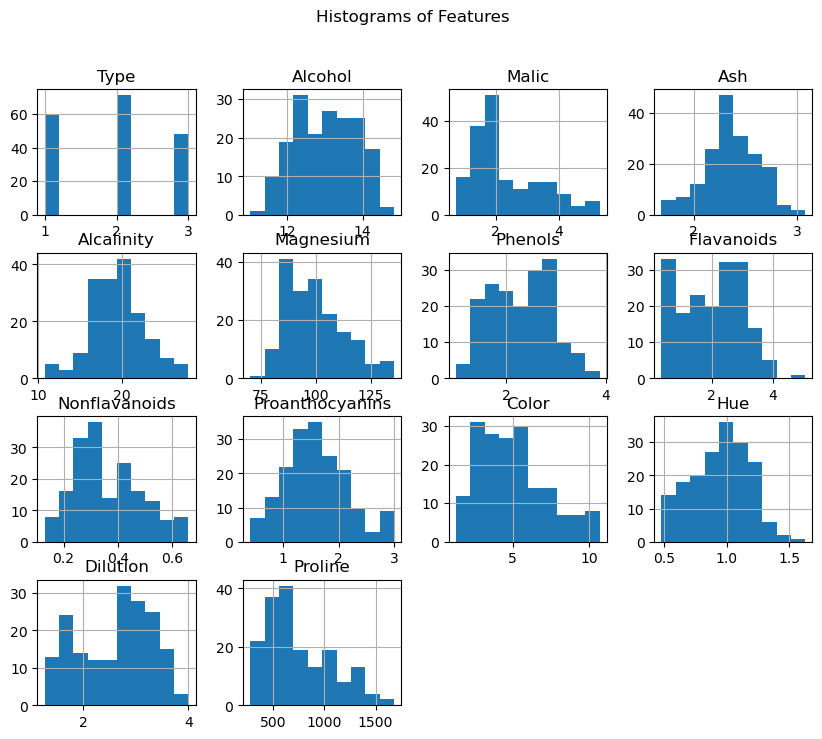

In [14]:
# Histograms
data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features')
plt.show()

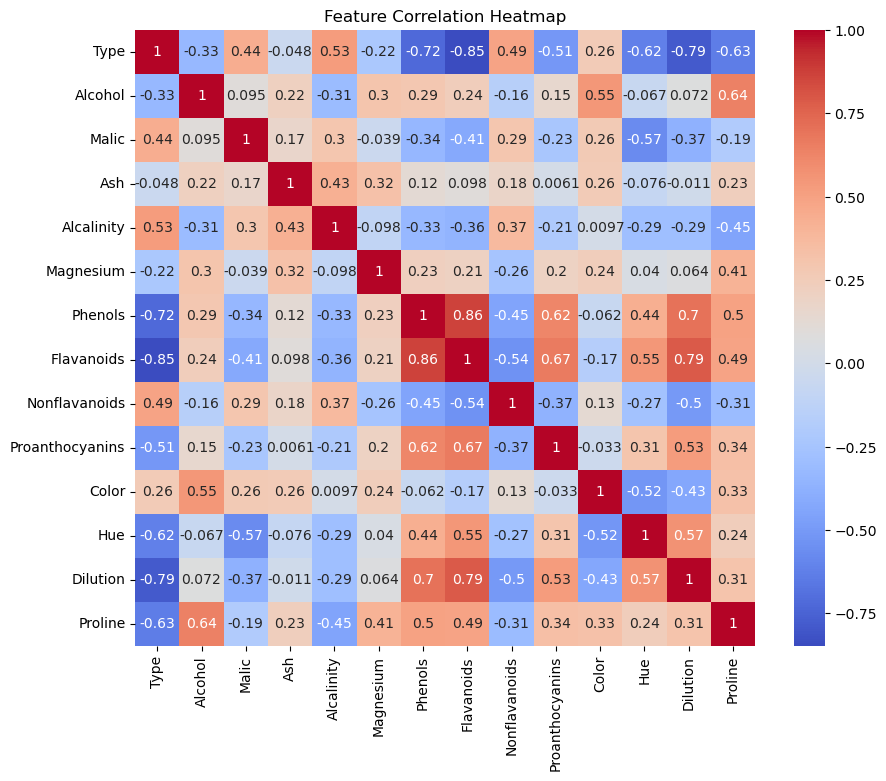

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

# Task 2: Dimensionality Reduction with PCA:

In [24]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [25]:
# Implement PCA
pca = PCA()
pca_data = pca.fit(scaled_data)

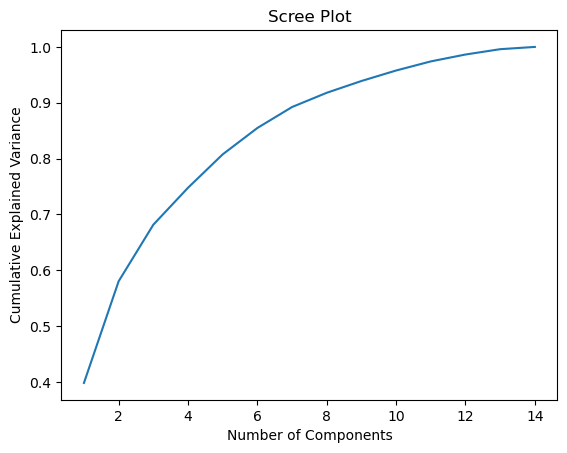

In [26]:
# Scree plot to determine optimal number of components
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [37]:
# 3. Determine the optimal number of principal components
n_components = 6 # Adjust as per your choice

In [38]:
# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Task 3: Clustering with Original Data:

In [52]:
# Apply K-means clustering to the original dataset
kmeans = KMeans(n_clusters=3, random_state=42)
original_clusters = kmeans.fit_predict(scaled_data)

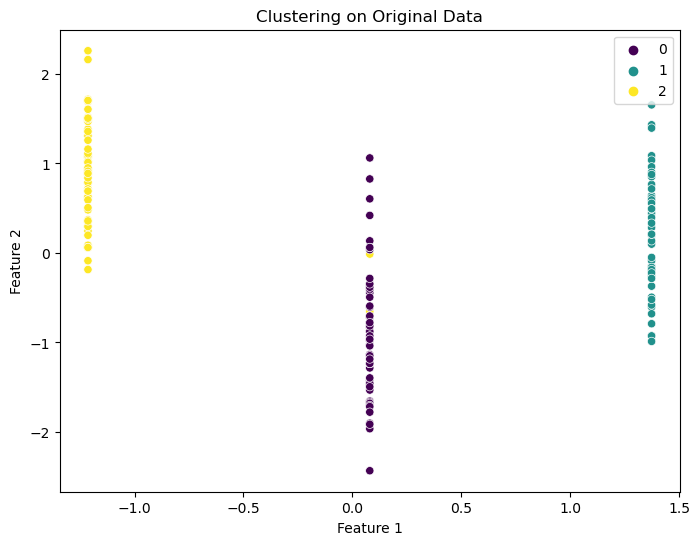

In [53]:
# Visualize clustering on original data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=original_clusters, palette='viridis')
plt.title('Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [55]:
#  Evaluate clustering performance
silhouette_original = silhouette_score(scaled_data, original_clusters)
db_index_original = davies_bouldin_score(scaled_data, original_clusters)
print("Original Data - Silhouette Score:", silhouette_original)
print("Original Data - Davies-Bouldin Index:", db_index_original)

Original Data - Silhouette Score: 0.308133619770163
Original Data - Davies-Bouldin Index: 1.310260091252707


# Task 4: Clustering with PCA Data:

In [61]:
#Apply the same clustering algorithm 
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_data)

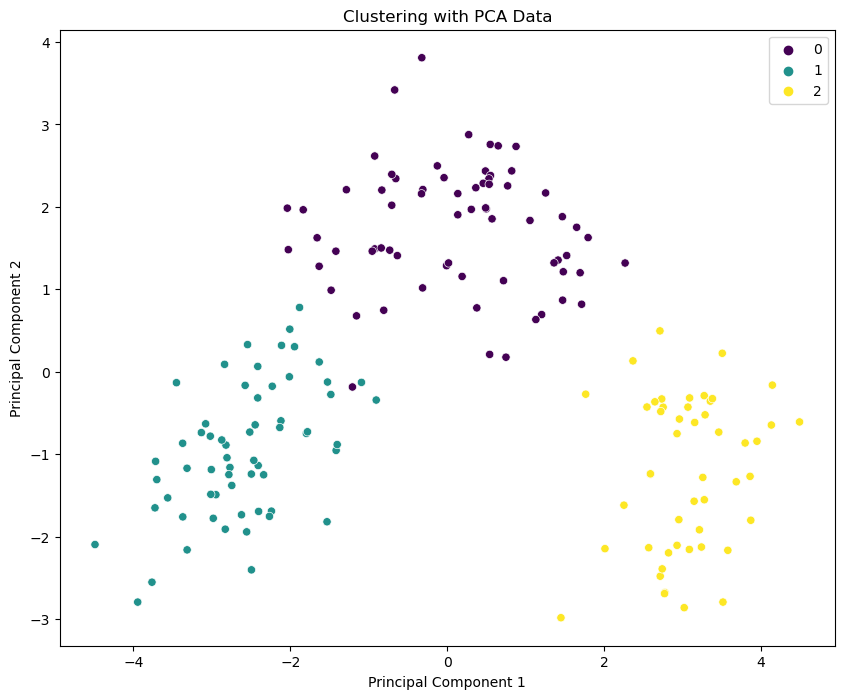

In [62]:
# Visualize clustering on original data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='viridis')
plt.title('Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [66]:
silhouette_pca = silhouette_score(pca_data, pca_clusters)
davies_bouldin_pca = davies_bouldin_score(pca_data, pca_clusters)
print(f"Silhouette Score (PCA Data): {silhouette_pca:.2f}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca:.2f}")

Silhouette Score (PCA Data): 0.37
Davies-Bouldin Index (PCA Data): 1.08


# Task 5: Comparison and Analysis:

In [68]:
#Compare the clustering results
#Original Data: Silhouette Score = 0.308, Davies-Bouldin Index = 1.31; clusters are distinguishable but poorly separated.
#PCA-Transformed Data: Silhouette Score = 0.37, Davies-Bouldin Index = 1.08; clusters are more compact and well-separated.

In [69]:
#Similarities: Both methods identify three clusters, retaining some data relationships.
#Differences: PCA improves clustering performance (better scores) and provides better-separated clusters visually.

In [ ]:
#trade-offs between using PCA and clustering directly on the original dataset.

#PCA
#Improves clustering performance by capturing key patterns in lower dimensions.
#Reduces noise and redundancy

# Task 6: Conclusion and Insights

In [ ]:
#In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction
#and performed clustering using K-means.
#We compared clustering results from the original data and PCA-transformed data
#highlighting the impact of dimensionality reduction on clustering performance.
#PCA and clustering are powerful techniques in data analysis, offering insights into underlying patterns and structures in data.